In [1]:
import pandas as pd
import re
import os
import glob

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import utils
import subprocess


In [3]:
from pybedtools import BedTool
def intersect_bed_files(bed_file1, bed_file2):
    bed1 = BedTool(bed_file1).sort()
    bed2 = BedTool(bed_file2).sort()

    # Intersect and split regions
    # Retain annotations from bed_file2 for overlapping regions
    merged = bed1.intersect(bed2, wa=True, wb=True)#.saveas("output/temp_intersect.bed")

    # Split non-overlapping regions from bed_file1
    non_overlapping = bed1.subtract(bed2)#.saveas("output/temp_non_overlapping.bed")

    return merged, non_overlapping

In [4]:
df_dar= pd.read_csv('/data2st1/junyi/output/atac0526/dar/region_nt/mementob_dar_noccur.csv')

In [5]:
df_dar.head()   

,names,tx,de_coef,de_se,de_pval,dv_coef,dv_se,dv_pval,ctname,region,...,gstart,gend,strand,annotation_x,distance,de_pval_adj,primary_region,secondary_region,darct,n_celltype
0,chr2:98662628-98663129,stim,0.297648,0.040250,1.275518e-13,-0.126407,0.107848,0.234857,Immune,PFC,...,98662236,98664083,+,genebody,0,3.038415e-12,exon,LINE,PFC_Glut/PFC_GABA,2.0
1,chrX:143482812-143483313,stim,0.367096,0.049646,1.308574e-13,0.010504,0.125507,0.992527,Immune,PFC,...,143518590,143797796,+,genebody,35278,3.114843e-12,distal,LINE,PFC_Glut/PFC_GABA,2.0
2,chr6:103648949-103649450,stim,0.297753,0.040198,1.474284e-13,-0.144116,0.094564,0.110749,Immune,PFC,...,103510585,103750211,+,genebody,0,3.496496e-12,intron,LINE,PFC_Glut/PFC_GABA,2.0
3,chr2:98662045-98662546,stim,0.314090,0.042905,2.253055e-13,-0.469675,0.251926,0.074096,Immune,PFC,...,98662236,98664083,+,genebody,0,5.274371e-12,exon,repeat,PFC_Glut/PFC_GABA,2.0
4,chr12:20815539-20816040,stim,0.679751,0.098147,5.078591e-12,-0.045391,0.226588,0.728508,Immune,PFC,...,20804380,20815779,-,genebody,0,1.072659e-10,exon,cpg,NaN,NaN


In [6]:
# out_dir ='/data2st1/junyi/output/atac0526/dar/GWAS'
# for ct in df_dar['ctname'].unique():
#     for condition in df_dar['condition'].unique():
#         df_sub = df_dar[(df_dar['ctname'] == ct) & (df_dar['condition'] == condition)]
#         if len(df_sub) == 0:
#             continue
#         df_bed = df_sub["names"].str.split(r'[:-]', expand=True)#.to_csv(f'{out_dir}/{ct}_{condition}_inner.bed', sep='\t', header=False, index=False)
#         df_bed.columns = ['chr', 'start', 'end']
#         df_bed['oid'] = df_sub.index
#         df_bed.to_csv(f'{out_dir}/{ct}_{condition}_inner.bed', sep='\t', header=False, index=False)

In [7]:
# import subprocess
# files = glob.glob('/data2st1/junyi/output/atac0526/dar/GWAS/*.bed')
# for filename in files:
#     experimentname = re.split(r'[./]', filename)[-2]
#     folder_name = os.path.dirname(filename)

#     #!/home/junyichen/liftOver /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR.bed /data2st1/junyi/mm39ToMm10.over.chain.gz /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_lifted.bed /data2st1/junyi/output/motif/PFC_Neuron_MW_wilcoxon_DAR_unmap.bed

#     command_str = f"/home/junyichen/liftOver {filename} /data2st1/junyi/mm10ToHg19.over.chain.gz {folder_name}/{experimentname}_lifted.bed {folder_name}/{experimentname}_unmap.bed"
#     print(command_str)
#     subprocess.run(command_str, shell=True)

In [8]:
# gwas_files = glob.glob('/data1st2/junyi/data/ssf/*formatted.tsv.gz')

# for filename in gwas_files:
#     experimentname = re.split(r'[./]', filename)[5]
#     df_gwas = pd.read_csv(filename, sep='\t', compression='gzip')
#     df_gwas_selected = df_gwas[df_gwas.p_value<5e-8].loc[:, ['chromosome', 'base_pair_location','rsid']]
#     df_gwas_selected['chromosome'] = 'chr' + df_gwas_selected['chromosome'].astype(str)
#     df_gwas_selected['end'] = df_gwas_selected['base_pair_location']
#     df_gwas_selected['rsid'] = df_gwas_selected['rsid']
#     df_gwas_selected = df_gwas_selected.loc[:, ['chromosome', 'base_pair_location', 'end', 'rsid']]
#     df_gwas_selected.to_csv(f'/data2st1/junyi/output/atac0526/dar/GWAS/{experimentname}_5e8.bed', sep='\t', header=False, index=False)

In [9]:
gwas_beds = glob.glob('/data2st1/junyi/output/atac0526/dar/GWAS/*5e8.bed')
lifted_files = glob.glob('/data2st1/junyi/output/atac0526/dar/GWAS/*_lifted.bed')
df_snp_all = pd.DataFrame(columns=['chr', 'start', 'end', 'oid', 'chromosome', 'start_gwas', 'end_gwas', 'experiment', 'gwas'])
for gwas_bed in ['/data2st1/junyi/output/atac0526/dar/GWAS/pgc-mdd2025_no23andMe_eur_v3-49-24-11_formatted_5e8.bed']:
    for lifted_file in lifted_files:
        experimentname = re.split(r'[./]', lifted_file)[-2]
        merged, non_overlapping = intersect_bed_files(lifted_file, gwas_bed)

        df_merged = merged.to_dataframe(names=['chr', 'start', 'end', 'oid', 'chromosome', 'start_gwas', 'end_gwas','rsid'])
        #df_merged.loc[:,['start','end','start_gwas','end_gwas']] = df_merged.loc[:,['start','end','start_gwas','end_gwas']].astype(int)
        df_merged['experiment'] = experimentname
        
        df_merged['gwas'] = os.path.basename(gwas_bed)

        df_snp_all = pd.concat([df_snp_all, df_merged], ignore_index=True)

In [10]:
df_gwas= pd.read_csv('/data1st2/junyi/data/ssf/pgc-mdd2025_no23andMe_eur_v3-49-24-11_formatted.tsv.gz',sep='\t', compression='gzip')

In [11]:
df_gwas['-log10(P-value)'] = -np.log10(df_gwas['p_value'])

In [12]:
df_snp_all_sorted = df_snp_all.sort_values(by='start').sort_values(
    by='chr',
    key=lambda x: x.str.replace('chr','').astype(int)
)

In [13]:
df_snp_all_sorted = df_snp_all_sorted.merge(df_gwas[['rsid', '-log10(P-value)']], left_on='rsid', right_on='rsid', how='left').sort_values('-log10(P-value)',ascending=False)

In [14]:
df_snp_all_sorted

,chr,start,end,oid,chromosome,start_gwas,end_gwas,experiment,gwas,rsid,-log10(P-value)
94,chr7,1883179,1883717,38408,chr7,1883274,1883274,Astro-Epen_MW_inner_lifted,pgc-mdd2025_no23andMe_eur_v3-49-24-11_formatte...,rs58169303,18.222211
50,chr3,49210212,49210739,69627,chr3,49210732,49210732,PFC_Glut_MW_inner_lifted,pgc-mdd2025_no23andMe_eur_v3-49-24-11_formatte...,rs7617480,18.085921
30,chr3,49577096,49577703,110946,chr3,49577665,49577665,Immune_MC_inner_lifted,pgc-mdd2025_no23andMe_eur_v3-49-24-11_formatte...,rs1982861,16.332547
34,chr3,49577096,49577703,103923,chr3,49577665,49577665,OPC-Oligo_MC_inner_lifted,pgc-mdd2025_no23andMe_eur_v3-49-24-11_formatte...,rs1982861,16.332547
36,chr3,49577096,49577703,136940,chr3,49577665,49577665,Astro-Epen_MC_inner_lifted,pgc-mdd2025_no23andMe_eur_v3-49-24-11_formatte...,rs1982861,16.332547
...,...,...,...,...,...,...,...,...,...,...,...
10,chr1,173836961,173837505,86261,chr1,173837051,173837051,HIP_Glut_MC_inner_lifted,pgc-mdd2025_no23andMe_eur_v3-49-24-11_formatte...,rs75315904,7.315514
11,chr1,173836961,173837505,101582,chr1,173837051,173837051,OPC-Oligo_MC_inner_lifted,pgc-mdd2025_no23andMe_eur_v3-49-24-11_formatte...,rs75315904,7.315514
2,chr1,173836961,173837505,147517,chr1,173837051,173837051,AMY_Glut_MC_inner_lifted,pgc-mdd2025_no23andMe_eur_v3-49-24-11_formatte...,rs75315904,7.315514
1,chr1,173836961,173837505,110317,chr1,173837051,173837051,Immune_MC_inner_lifted,pgc-mdd2025_no23andMe_eur_v3-49-24-11_formatte...,rs75315904,7.315514


In [ ]:
#df_snp_all_sorted.to_csv('/data2st1/junyi/output/atac0526/dar/GWAS/pgc-mdd2025_no23andMe_div_v3-49-46-01_formatted_1e5_lifted_intersected.csv')

,chr,start,end,oid,chromosome,start_gwas,end_gwas,experiment,gwas,rsid,-log10(P-value)
308,chr7,1883179,1883717,38408,chr7,1883274,1883274,Astro-Epen_MW_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs58169303,18.821311
179,chr3,49210212,49210739,69627,chr3,49210732,49210732,PFC_Glut_MW_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs7617480,17.836540
142,chr3,49577096,49577703,103923,chr3,49577665,49577665,OPC-Oligo_MC_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932
132,chr3,49577096,49577703,80130,chr3,49577665,49577665,HIP_GABA_MC_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932
134,chr3,49577096,49577703,67523,chr3,49577665,49577665,PFC_Glut_MW_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932
128,chr3,49577096,49577703,142970,chr3,49577665,49577665,AMY_Glut_MC_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932
131,chr3,49577096,49577703,20471,chr3,49577665,49577665,Immune_MW_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932
176,chr3,49577096,49577703,110946,chr3,49577665,49577665,Immune_MC_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932
129,chr3,49577096,49577703,148240,chr3,49577665,49577665,AMY_GABA_MC_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932
173,chr3,49577096,49577703,85827,chr3,49577665,49577665,HIP_Glut_MC_inner_lifted,pgc-mdd2025_no23andMe_div_v3-49-46-01_formatte...,rs1982861,15.692932


In [15]:
df_dar_gwas = df_dar.iloc[df_snp_all_sorted.oid]

In [16]:
df_dar_gwas['chr_h19'] = df_snp_all_sorted['chromosome'].values
df_dar_gwas['snp_h19'] = df_snp_all_sorted['start_gwas'].values
df_dar_gwas['rsid'] = df_snp_all_sorted['rsid'].values
df_dar_gwas['-log10p_gwas'] = df_snp_all_sorted['-log10(P-value)'].values
df_dar_gwas['gwas_data'] = df_snp_all_sorted['gwas'].values

/tmp/ipykernel_2116779/3479497382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dar_gwas['chr_h19'] = df_snp_all_sorted['chromosome'].values
/tmp/ipykernel_2116779/3479497382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dar_gwas['snp_h19'] = df_snp_all_sorted['start_gwas'].values
/tmp/ipykernel_2116779/3479497382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [17]:
df_dar_gwas.to_csv('/data2st1/junyi/output/atac0526/dar/GWAS/pgc-mdd2025_no23andMe_eur_v3-49-24-11_formatted_5e8_result.csv', index=False)

In [18]:
df = df_gwas.sort_values(["chromosome", "base_pair_location"])   # Sort by chromosome and position
df["index"] = range(len(df))           # Add index for x-axis


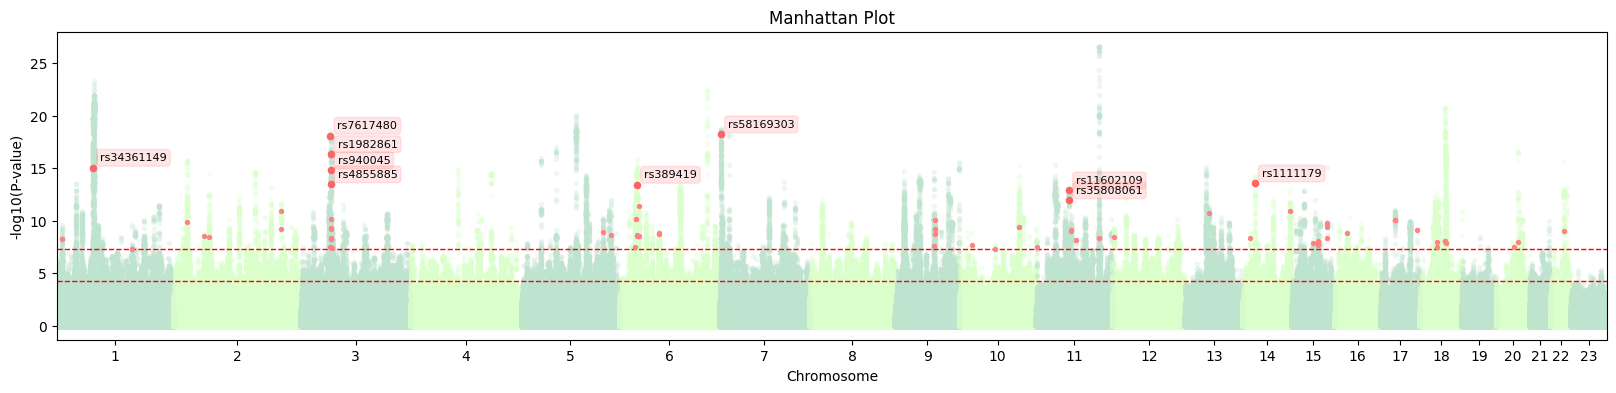

In [25]:

plt.figure(figsize=(20, 4))
colors = ["#DBFFCB", "#BEE4D0"]  # Alternating colors
for chrom, group in df.groupby("chromosome"):
    color = colors[chrom % 2]     # Alternate colors
    plt.scatter(group["index"], group["-log10(P-value)"], color=color, s=8, alpha=0.2)

# Add significance threshold
plt.axhline(y=-np.log10(5e-8), color="r", linestyle="--", linewidth=1)
plt.axhline(y=-np.log10(5e-5), color="r", linestyle="--", linewidth=1)


highlight_ids = list(set(df_snp_all_sorted.drop_duplicates(['rsid']).head(10)['rsid'].values))  # Replace with your SNP IDs
highlight_df = df[df["rsid"].isin(highlight_ids)]


overlap_ids = list(set(df_snp_all_sorted['rsid'].values))
overlap_df = df[df["rsid"].isin(overlap_ids)]

plt.scatter(
    overlap_df["index"], 
    overlap_df["-log10(P-value)"], 
    color="#FF8282",          # Fill color
   # marker="*",           # Star-shaped marker
    s=8,                # Size
    #edgecolors="black",   # Bold border
    #linewidths=1.5,       # Border thickness
    zorder=3              # Ensure points appear on top
)


plt.scatter(
    highlight_df["index"], 
    highlight_df["-log10(P-value)"], 
    color="#FF6363",          # Fill color
   # marker="*",           # Star-shaped marker
    s=20,                # Size
    #edgecolors="black",   # Bold border
    #linewidths=1.5,       # Border thickness
    zorder=3              # Ensure points appear on top
)

for _, row in highlight_df.iterrows():
    plt.annotate(
        row["rsid"],                          # SNP ID as text
        xy=(row["index"], row["-log10(P-value)"]),  # Coordinates of the point
        xytext=(5, 5),                        # Offset from the point (in points)
        textcoords="offset points",           # Coordinate system for xytext
        fontsize=8,
        bbox=dict(boxstyle="round", alpha=0.2, color="#FF8282"),  # Optional background
        zorder=4                              # Ensure labels appear above points
    )


plt.xlabel("Chromosome")
plt.ylabel("-log10(P-value)")
plt.title("Manhattan Plot")

# Customize x-axis ticks (optional)
chrom_df = df.groupby("chromosome")["index"].median()
plt.xticks(chrom_df, chrom_df.index)
plt.xlim(0, len(df))


plt.show()
